# APPLICATION OF INFERENTIAL STATISTICS ON HOUSING PRICES
In this project we shall explore the Target variable i.e Saleprice and it relation with some variables. We will analyse few variabes by applying inferential statistics. We aill also conduct Hypothesis Test to validate our assumptions.

In [2]:
# Necessary import and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")


In [3]:
df=pd.read_csv('E:\\TANU\\datasets\\housing price\\train.csv')

# Target Variable

### Histogram of Sale Price 
Let's take a look at the Target Variable- SalePrice.

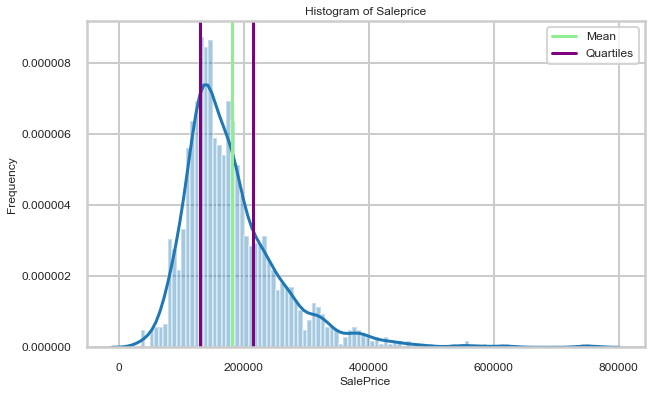

In [16]:
# Plotting Histogram of SalePrice
plt.figure(figsize=(10,6))
sns.distplot(df['SalePrice'], norm_hist=False, kde = True, bins=100)
plt.axvline(df['SalePrice'].mean(), color='lightgreen', linewidth=3, label='Mean')
plt.axvline(np.percentile(df['SalePrice'],25), color='purple', linewidth=3, label='Quartiles')
plt.axvline(np.percentile(df['SalePrice'],75), color='purple', linewidth=3)
plt.xlabel('SalePrice',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Saleprice',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [47]:
print('Mean of SalePrice is: {} and Standard deviation is: {}'.format( round(df['SalePrice'].mean(),2),round(df['SalePrice'].std(),2)))

Mean of SalePrice is: 180921.2 and Standard deviation is: 79442.5


In [15]:
print('Median of SalePrice is: {} and Inter Qualrtile Range is: {}'.format( round(df['SalePrice'].median(),2),round((np.percentile(df['SalePrice'],75)-np.percentile(df['SalePrice'],25)),2)))

Median of SalePrice is: 163000.0 and Inter Qualrtile Range is: -84025.0


In [10]:
print('Kurtosis of Sale Price is: {} and skewness is: {}'.format( round(df['SalePrice'].kurt(),2),round(df['SalePrice'].skew(),2)))


Kurtosis of Sale Price is: 6.54 and skewness is: 1.88


6.536281860064529

__Observations:__
1. The distribution is not normal. Mean Saleprice and median Saleprice, both have lower probabilities of occurence than the mode.
2. Distribution of SalePrice is leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian.
3. The distribution is right skewed. The range of upper 25% of data is around 60000 which is 3 times more that the Interquartile range.
4. Mean Saleprice is not a good representation and there are quite a number of outliers.

### Cumulative Distribution Comparison
Let's also compare the cumulative distribution of SalePrice with a normal distribution sharing same parameters

Text(0.5, 1.0, 'Cumulative Distribution Comparison')

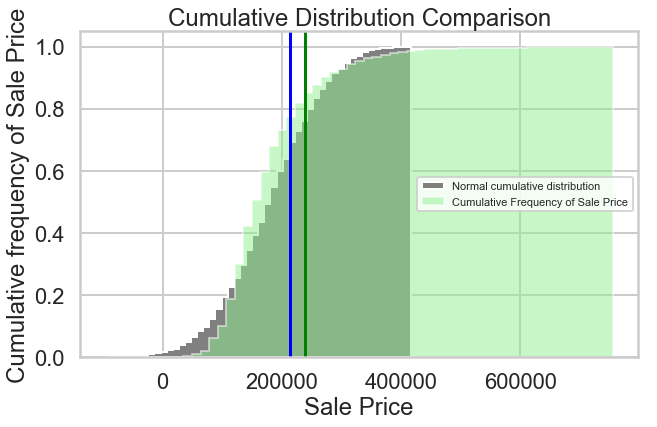

In [29]:
#Plotting cumulative distribution of Sale Price and cumulative normal distribution for comparison.
normal = np.random.normal(np.mean(df['SalePrice']), np.std(df['SalePrice']), size=len(df))
plt.figure(figsize=(10,6))
plt.hist(normal, cumulative=True, density=True, color='grey',histtype='stepfilled',rwidth=None, bins=50, label='Normal cumulative distribution')
plt.hist(df['SalePrice'], cumulative=True, density=True, color='lightgreen',histtype='stepfilled',rwidth=None,alpha=.5, bins=50, label='Cumulative Frequency of Sale Price')
plt.legend(loc='center right', fontsize=11)
plt.axvline(np.percentile(normal, 75), color='green')
plt.axvline(np.percentile(df['SalePrice'], 75), color='blue')
plt.xlabel('Sale Price')
plt.ylabel('Cumulative frequency of Sale Price')
plt.title('Cumulative Distribution Comparison')

Its very clear that SalePrice does not conform to a normal pattern. There is also greater chance of SalePrice in range 100000 to 300000 occuring in comparison to what a normal distribution should have. We can also see that the range of upper 25% of Sale Price is abnormally greater than normal pattern.

###  95% confidence interval of Mean
With this information its difficult to estimate the population mean. It is more crucial to know if our sample mean is in reasonable range or close to population mean.
However as per Central Limit Theorem, the distribution of the averages from samples of population will be closely approximated by a normal distribution. We can extract the 95% confidence interval of sample means.
If the actual mean is well within this range, we could use this statistic for many base calculations.
For this we will create bootstrap samples to calculate the sample means.

In [32]:
#Drawing bootstrap samples and calculating means
bootstrap_replicates=[]
for x in range(10000):
    saleprice=np.random.choice(df['SalePrice'], size=len(df['SalePrice']))
    bootstrap_replicates.append(saleprice.mean())

In [41]:
print('The 95% confidence interval of Mean is: [{} , {}]'. format(round(np.percentile(bootstrap_replicates, 2.5),2), round(np.percentile(bootstrap_replicates, 75),2)))

The 95% confidence interval of Mean is: [176829.95 , 182334.95]


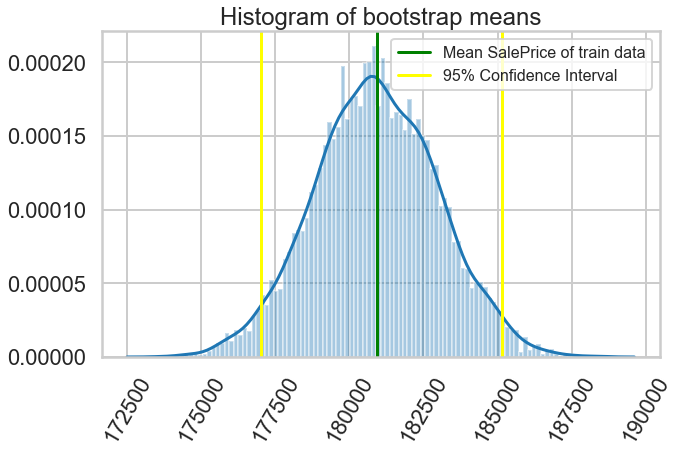

In [46]:
# Plotting Histogram of the bootstrap replicates
plt.figure(figsize=(10,6))
sns.distplot(bootstrap_replicates, norm_hist=False, kde = True, bins=100)
plt.axvline(df['SalePrice'].mean(), color='green', linewidth=3, label='Mean SalePrice of train data')
plt.axvline(177004, color='yellow', linewidth=3, )
plt.axvline(185157, color='yellow', linewidth=3, label='95% Confidence Interval')
plt.xticks(rotation=60)
plt.title('Histogram of bootstrap means')
plt.legend(loc='upper right', fontsize=16)

Though as Sale Price has high value outliersin high range, we find that the mean is not just in the 95% confidence interval but is also in the mid high probability range. This gives some confidence of using this mean value for some base calculations. 

# Hypothesis test on correlation
Since our objective is to predict Sale Price.Let's take a look at the variable that Sale Price has a high correlation for applying linear models. However, just looking as the correlation is not sufficient proof of a linear relationship as the population data is unknown. For this we need to do a Hypothesis test.



In [10]:
# Finding highly correlated independent variables 
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

So we see that Sale Price has a high correlation with GrliveArea. Now lets create a null hypothesis.

Null Hypothesis H0: There is no correlation between 'GrLiveArea' and 'SalePrice' .
Alternate Hypothesis H1: There is significant correlation between 'GrLiveArea' and 'SalePrice'.

In [11]:
# Calculation of p value
# We create permutation samples of GrliveArea and calculate correlations with SalePrice 
corr_observed=np.corrcoef(df['GrLivArea'], df['SalePrice'])[1][0]
perm_replicates=[]
for x in range(10000):
    grlivearea_sample=np.random.permutation(df['GrLivArea'])
    perm_replicates.append(np.corrcoef(grlivearea_sample, df['SalePrice'].values)[1][0])
perm_reps=[ x  for x in perm_replicates if x>=corr_observed]
p=len(perm_reps)/len(perm_replicates)
print('p value is:  ',p )


p value is:   0.0


P value is zero. There are no cases like the observed correlation which is close to zero correlation. So we can reject the null hypothesis. This means that there is a significant linear relationship between Sale Price and GrLiveAre and we can go ahead and apply Linear Models. We can also plot it.. 

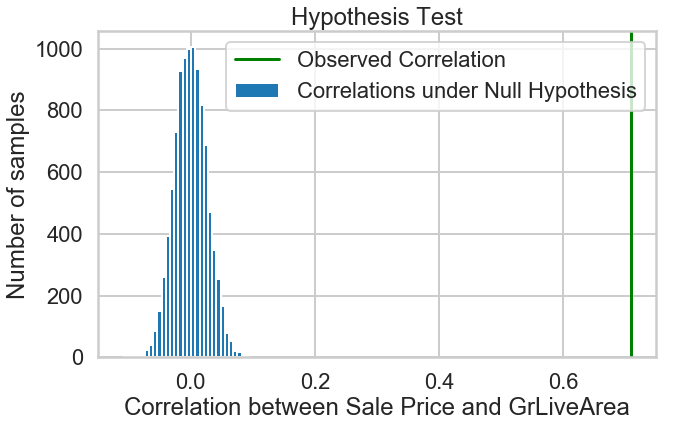

In [12]:
#Plotting the Correlations
plt.figure(figsize=(10,6))
plt.hist( perm_replicates, bins=30, label='Correlations under Null Hypothesis')
plt.axvline(corr_observed, color='green', label='Observed Correlation')
plt.xlabel('Correlation between Sale Price and GrLiveArea')
plt.ylabel('Number of samples')
plt.title('Hypothesis Test')
plt.legend()